In [ ]:
from requests import Request, Session
import json
import pprint
import numpy as np

In [ ]:
!pip install arch
from arch import arch_model

     |████████████████████████████████| 902 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 32.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
! pip install cryptocmd
! pip install git+git://github.com/guptarohit/cryptoCMD.git

     |████████████████████████████████| 48 kB 2.2 MB/s 
  Cloning git://github.com/guptarohit/cryptoCMD.git to /tmp/pip-req-build-v0fdqym4
  Running command git clone -q git://github.com/guptarohit/cryptoCMD.git /tmp/pip-req-build-v0fdqym4
  fatal: unable to connect to github.com:
  github.com[0: 140.82.112.3]: errno=Connection timed out

ERROR: Command errored out with exit status 128: git clone -q git://github.com/guptarohit/cryptoCMD.git /tmp/pip-req-build-v0fdqym4 Check the logs for full command output.


In [ ]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re
from cryptocmd import CmcScraper
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
scraper = CmcScraper('BTC',"01-05-2018","01-02-2021") # initialise scraper without passing time interv
headers, data = scraper.get_data()
#scraper.export_csv('btc_all_time.csv')   
df_price = scraper.get_dataframe().sort_index(ascending=False)
price=df_price["Close"].values.tolist()
df_price

,Date,Open,High,Low,Close,Volume,Market Cap
1007,2018-05-01,9251.469727,9255.879883,8891.049805,9119.009766,7.713020e+09,1.551141e+11
1006,2018-05-02,9104.599609,9256.519531,9015.139648,9235.919922,7.558160e+09,1.571199e+11
1005,2018-05-03,9233.969727,9798.330078,9188.150391,9743.860352,1.020730e+10,1.657784e+11
1004,2018-05-04,9695.500000,9779.200195,9585.959961,9700.759766,8.217830e+09,1.650628e+11
1003,2018-05-05,9700.280273,9964.500000,9695.120117,9858.150391,7.651940e+09,1.677600e+11
...,...,...,...,...,...,...,...
4,2021-01-28,30441.041817,33858.310992,30023.206832,33466.096358,7.651716e+10,6.229101e+11
3,2021-01-29,34318.671692,38406.260965,32064.814187,34316.387650,1.178946e+11,6.387687e+11
2,2021-01-30,34295.935044,34834.708301,32940.186914,34269.521542,6.514183e+10,6.379246e+11
1,2021-01-31,34270.877592,34288.331475,32270.176025,33114.357748,5.275454e+10,6.164527e+11


In [ ]:
scraper = CmcScraper('BTC',"01-05-2018","01-02-2021") # initialise scraper without passing time interv
headers, data = scraper.get_data()
#scraper.export_csv('btc_all_time.csv')   
df_price = scraper.get_dataframe()


def parse_strlist(sl):
    clean = re.sub("[\[\],\s]","",sl)
    splitted = re.split("[\'\"]",clean)
    values_only = [s for s in splitted if s != '']
    return values_only

url = 'https://bitinfocharts.com/comparison/tweets-btc.html#6m'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

scripts = soup.find_all('script')
for script in scripts:
    if 'd = new Dygraph(document.getElementById("container")' in script.text:
        StrList = script.text
        StrList = '[[' + StrList.split('[[')[-1]
        StrList = StrList.split(']]')[0] +']]'
        StrList = StrList.replace("new Date(", '').replace(')','')
        dataList = parse_strlist(StrList)

date = []
tweet = []
for each in dataList:
    if (dataList.index(each) % 2) == 0:
        date.append(each)
    else:
        tweet.append(each)

df_vol = pd.DataFrame(list(zip(date, tweet)), columns=["Date","Tweet Volume"])

In [ ]:
twitter_vol=df_vol.iloc[1483:2491]


for i in range(0,len(twitter_vol)):
    if twitter_vol.iloc[i]["Tweet Volume"]!="null":
      twitter_vol.iloc[i]["Tweet Volume"]= float(twitter_vol.iloc[i]["Tweet Volume"])
    if twitter_vol.iloc[i]["Tweet Volume"]=="null":
      twitter_vol.iloc[i]["Tweet Volume"]=twitter_vol.iloc[i-1]["Tweet Volume"]


twitter_vol=twitter_vol["Tweet Volume"].values.tolist()


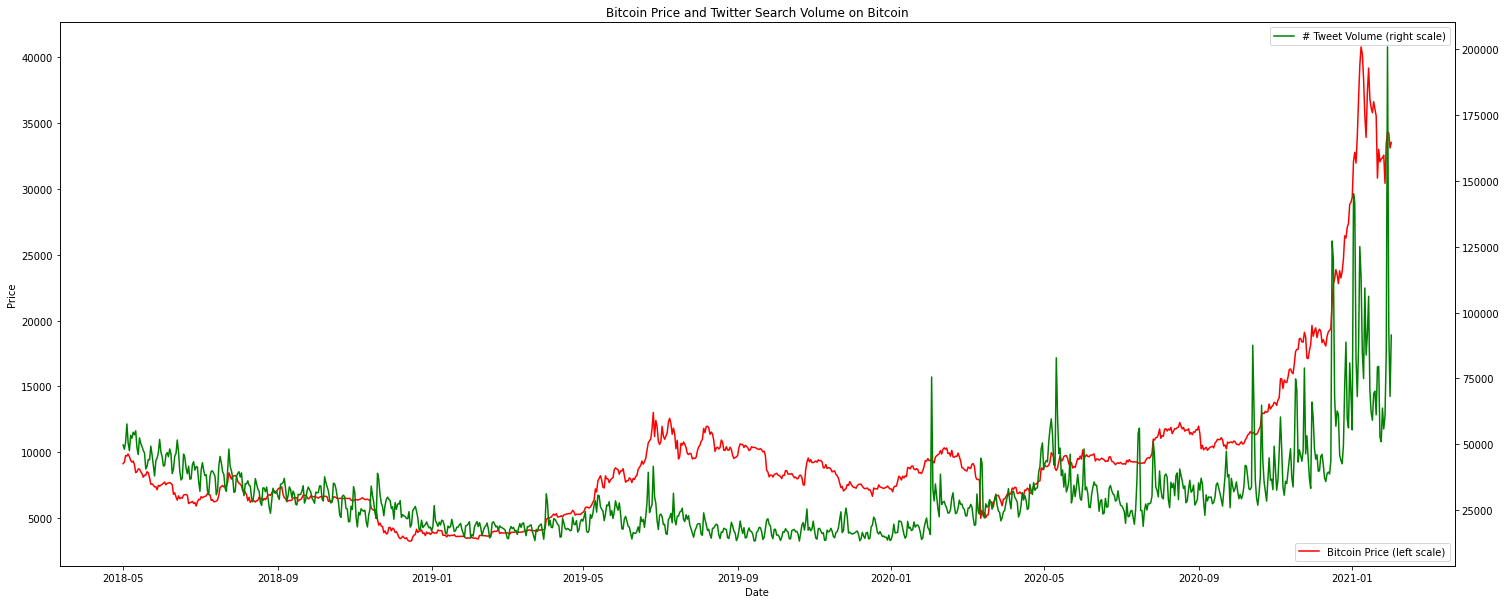

In [ ]:
import datetime as dt
import matplotlib.dates as mdates
dates = df_vol[1483:2491]["Date"]
x = [dt.datetime.strptime(d,'%Y/%m/%d').date() for d in dates]

fig, ax1 = plt.subplots(figsize=(25,10))
ax1.plot(x,price, label='Bitcoin Price (left scale)', color='r')
ax2 = ax1.twinx()
ax2.plot(x,twitter_vol,label="# Tweet Volume (right scale)",color="g")

ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax1.legend(loc=4)
ax1.set_title("Bitcoin Price and Twitter Search Volume on Bitcoin")
ax2.legend()
plt.show()

In order to investigate users’ rationality and dispassion towards their Bitcoin price evaluation, we acquire different major events in order to make the insights on user behaviour more expressive. The dates of 24 events are gathered from https://en.bitcoin.it/wiki/History, comprising significant events that may have affected the Bitcoin community and therefore will most likely evoke Bitcoin price corrections indicated by abnormal returns in the exchange rate. The events focus either on exceptional positive (new exchange launches, legal successes or significant news articles) or negative (major system bugs, thefts, hacks or exchange breakdown) news which are directly related to the Bitcoin system, security and infrastructure.



In [ ]:
df_price=df_price.reset_index().drop(["index"],axis=1)
df_price["return"]=df_price["Close"]/df_price["Open"]-1
df_price=df_price.sort_index(ascending=False).reset_index()
returns_pct = 100 * df_price.Close.pct_change().dropna()
df_price=df_price.drop(["High","Low","Volume","Market Cap","index"],axis=1)

In [ ]:
df_price.to_csv("bitcoin_price.csv")

#ACF/PACF TEST

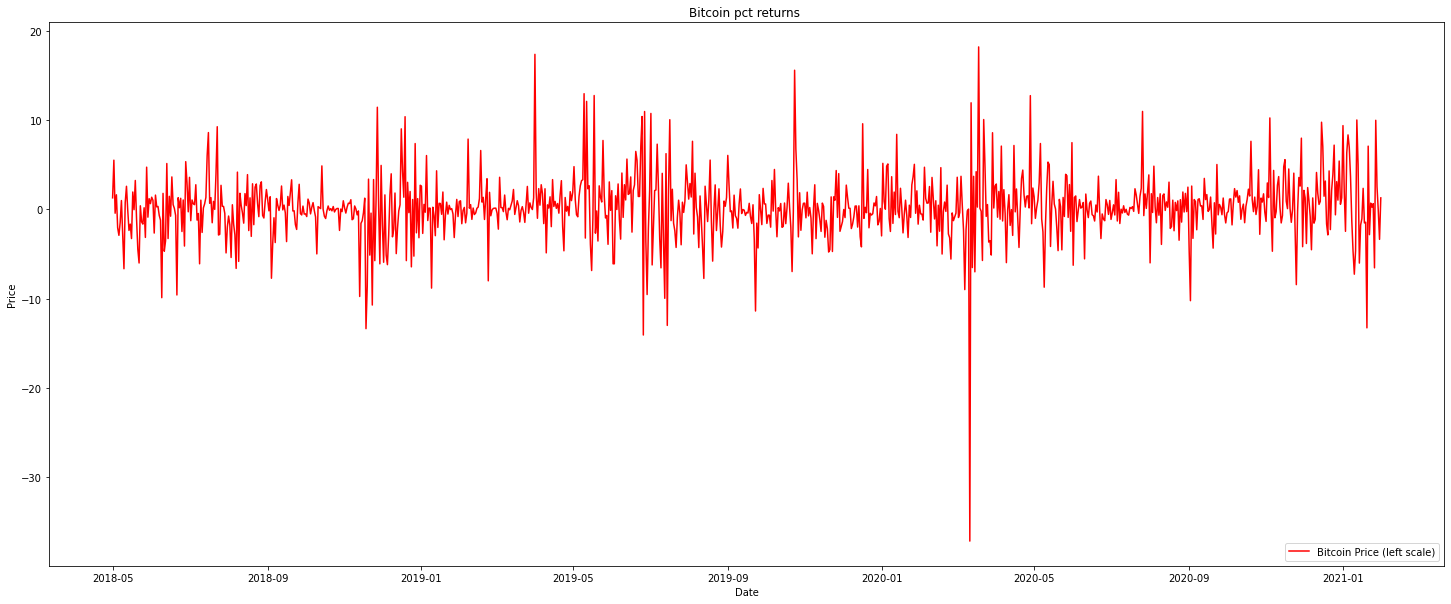

In [ ]:
dates = df_vol[1483:2490]["Date"]
x = [dt.datetime.strptime(d,'%Y/%m/%d').date() for d in dates]


fig, ax1 = plt.subplots(figsize=(25,10))
ax1.plot(x,returns_pct, label='Bitcoin Price (left scale)', color='r')

ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax1.legend(loc=4)
ax1.set_title("Bitcoin pct returns ")

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

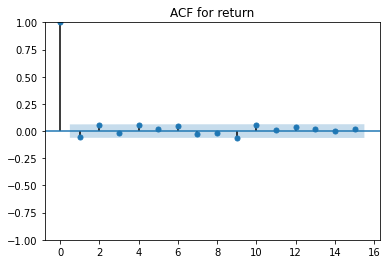

In [ ]:
plot_acf(returns_pct, lags=15)
plt.title ("ACF for return")
plt.show()

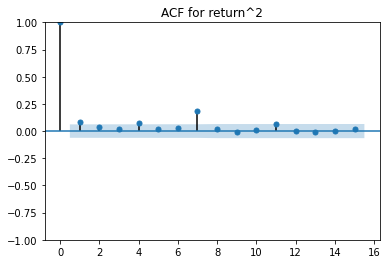

In [ ]:
plot_acf(returns_pct**2, lags=15)
plt.title ("ACF for return^2")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


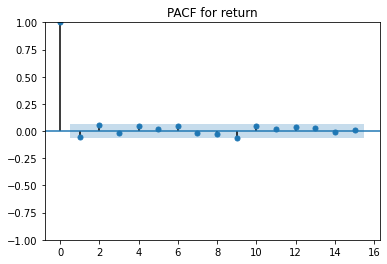

In [ ]:
plot_pacf(returns_pct, lags=15)
plt.title ("PACF for return")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


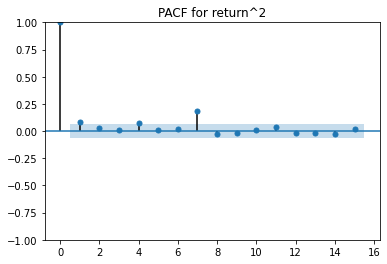

In [ ]:
plot_pacf(returns_pct**2, lags=15)
plt.title ("PACF for return^2")
plt.show()

In [ ]:
df_price["twitter_vol"]=twitter_vol
df_price["return_1"]=df_price["return"].shift(1)
df_price["return_2"]=df_price["return"].shift(2)
df_price["return_3"]=df_price["return"].shift(3)
df_price["return_4"]=df_price["return"].shift(4)
df_price["return_5"]=df_price["return"].shift(5)
df_price["return_6"]=df_price["return"].shift(6)
df_price["return_7"]=df_price["return"].shift(7)


df_price["tweet_diff_1"]=df_price["twitter_vol"].diff(1)
events=pd.read_csv("events.csv")
df=pd.concat([df_price,events],axis=1) 
df=df.drop(["Open","High","Low", "Close","Volume","Market Cap","index","Date"],axis=1)

In [ ]:
df

,return,twitter_vol,return_1,return_2,return_3,return_4,return_5,return_6,return_7,tweet_diff_1,Positive,Negative
0,-0.014318,49777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,0.014424,48137.0,-0.014318,NaN,NaN,NaN,NaN,NaN,NaN,-1640.0,1,0
2,0.055219,50882.0,0.014424,-0.014318,NaN,NaN,NaN,NaN,NaN,2745.0,0,0
3,0.000542,57751.0,0.055219,0.014424,-0.014318,NaN,NaN,NaN,NaN,6869.0,0,0
4,0.016275,50536.0,0.000542,0.055219,0.014424,-0.014318,NaN,NaN,NaN,-7215.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0.099374,84933.0,-0.065455,0.006528,0.002496,0.007017,-0.027834,0.071003,-0.132877,24281.0,0,0
1004,-0.000067,200783.0,0.099374,-0.065455,0.006528,0.002496,0.007017,-0.027834,0.071003,115850.0,1,0
1005,-0.000770,93578.0,-0.000067,0.099374,-0.065455,0.006528,0.002496,0.007017,-0.027834,-107205.0,0,0
1006,-0.033746,68163.0,-0.000770,-0.000067,0.099374,-0.065455,0.006528,0.002496,0.007017,-25415.0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
data = df.values[:, :df.shape[1]]
trans = StandardScaler()
data = trans.fit_transform(data)
df_final = pd.DataFrame(data)
df_final.columns=["return","twitter_vol",	"return_1",	"return_2",	"return_3","return_4",	"return_5",	"return_6",	"return_7",	"tweet_diff_1","positive","negative"]

In [ ]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#MODEL 1


INPUT: lag return (1 day)+ tweet volume difference

In [ ]:
# MODEL 1
LR_result_1=[]
LR_result_1.append("model 1:")
df_model=df_final[1:len(df_final)]


X = df_model[['return_1','tweet_diff_1']] 
Y = df_model['return']

In [ ]:
am = arch_model(Y, X, mean='ARX')
res = am.fit()
res

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1377.648397613273
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1377.1613903569157
Iteration:      3,   Func. Count:     32,   Neg. LLF: 1377.1361381584538
Iteration:      4,   Func. Count:     43,   Neg. LLF: 1377.1273131691119
Iteration:      5,   Func. Count:     54,   Neg. LLF: 1377.1207814849117
Iteration:      6,   Func. Count:     64,   Neg. LLF: 1377.1052290340376
Iteration:      7,   Func. Count:     73,   Neg. LLF: 1377.0878393487844
Iteration:      8,   Func. Count:     81,   Neg. LLF: 1377.0637991553047
Iteration:      9,   Func. Count:     90,   Neg. LLF: 1377.062985442863
Iteration:     10,   Func. Count:     98,   Neg. LLF: 1377.0628940713277
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1377.0628940713682
            Iterations: 10
            Function evaluations: 98
            Gradient evaluations: 10


                          AR-X - GARCH Model Results                          
Dep. Variable:                 return   R-squared:                       0.019
Mean Model:                      AR-X   Adj. R-squared:                  0.017
Vol Model:                      GARCH   Log-Likelihood:               -1377.06
Distribution:                  Normal   AIC:                           2766.13
Method:            Maximum Likelihood   BIC:                           2795.61
                                        No. Observations:                 1007
Date:                Sat, Nov 06 2021   Df Residuals:                     1004
Time:                        15:36:01   Df Model:                            3
                                   Mean Model                                  
                   coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------------------------------------------------
Const        6.7836e-03  2.843e-02      0.239    

#MODEL2

INPUT: lag return (1 day)+ tweet volume difference + positive events+ negative events 

In [ ]:
# MODEL 1
LR_result_1=[]
LR_result_1.append("model 1:")
df_model=df_final[1:len(df_final)]

X = df_model[['return_1','tweet_diff_1',"positive","negative"]] 
Y = df_model['return']


In [ ]:
am = arch_model(Y, X, mean='ARX')
res = am.fit()
res

Iteration:      1,   Func. Count:     10,   Neg. LLF: 1376.9667485396294
Iteration:      2,   Func. Count:     24,   Neg. LLF: 1376.4994671051968
Iteration:      3,   Func. Count:     37,   Neg. LLF: 1376.4742114651658
Iteration:      4,   Func. Count:     50,   Neg. LLF: 1376.4663800062444
Iteration:      5,   Func. Count:     63,   Neg. LLF: 1376.4536183284845
Iteration:      6,   Func. Count:     76,   Neg. LLF: 1376.449763086084
Iteration:      7,   Func. Count:     87,   Neg. LLF: 1376.4145906782146
Iteration:      8,   Func. Count:     99,   Neg. LLF: 1376.4103108580052
Iteration:      9,   Func. Count:    112,   Neg. LLF: 1376.4101795752379
Iteration:     10,   Func. Count:    123,   Neg. LLF: 1376.3957399359742
Iteration:     11,   Func. Count:    133,   Neg. LLF: 1376.394543925733
Iteration:     12,   Func. Count:    143,   Neg. LLF: 1376.3943675705216
Iteration:     13,   Func. Count:    153,   Neg. LLF: 1376.394354052492
Optimization terminated successfully.    (Exit mode 0)

                          AR-X - GARCH Model Results                          
Dep. Variable:                 return   R-squared:                       0.020
Mean Model:                      AR-X   Adj. R-squared:                  0.016
Vol Model:                      GARCH   Log-Likelihood:               -1376.39
Distribution:                  Normal   AIC:                           2768.79
Method:            Maximum Likelihood   BIC:                           2808.11
                                        No. Observations:                 1007
Date:                Sat, Nov 06 2021   Df Residuals:                     1002
Time:                        15:36:01   Df Model:                            5
                                   Mean Model                                  
                   coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------------------------------------------------
Const        6.3103e-03  2.847e-02      0.222    

#MODEL3 


In [ ]:
# MODEL 3
LR_result_1=[]
LR_result_1.append("model 1:")
df_model=df_final[7:len(df_final)]

X = df_model[['return_1','return_2','return_3','return_4','return_5','return_6','return_7','tweet_diff_1',"positive","negative"]] 
Y = df_model['return']


In [ ]:
am = arch_model(Y, X, mean='ARX',lags=7)
res = am.fit()
res

Iteration:      1,   Func. Count:     23,   Neg. LLF: 1358.4595861532239
Iteration:      2,   Func. Count:     50,   Neg. LLF: 1356.590022044522
Iteration:      3,   Func. Count:     77,   Neg. LLF: 1356.571476121865
Iteration:      4,   Func. Count:    103,   Neg. LLF: 1356.5548671197434
Iteration:      5,   Func. Count:    129,   Neg. LLF: 1356.534026778184
Iteration:      6,   Func. Count:    155,   Neg. LLF: 1356.5235953645215
Iteration:      7,   Func. Count:    181,   Neg. LLF: 1356.5206927202225
Iteration:      8,   Func. Count:    206,   Neg. LLF: 1356.5005324842148
Iteration:      9,   Func. Count:    231,   Neg. LLF: 1356.4688513579308
Iteration:     10,   Func. Count:    256,   Neg. LLF: 1356.4230174868737
Iteration:     11,   Func. Count:    282,   Neg. LLF: 1356.4176047683716
Iteration:     12,   Func. Count:    308,   Neg. LLF: 1356.4167663722733
Iteration:     13,   Func. Count:    333,   Neg. LLF: 1356.4145830809655
Iteration:     14,   Func. Count:    359,   Neg. LLF: 

                          AR-X - GARCH Model Results                          
Dep. Variable:                 return   R-squared:                       0.028
Mean Model:                      AR-X   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:               -1356.41
Distribution:                  Normal   AIC:                           2754.82
Method:            Maximum Likelihood   BIC:                           2857.76
                                        No. Observations:                  994
Date:                Sat, Nov 06 2021   Df Residuals:                      976
Time:                        15:36:01   Df Model:                           18
                                   Mean Model                                  
                   coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------------------------------------------------
Const        7.2126e-03  2.745e-02      0.263    

#Exploration1- Volatility

ARCH(7)

In [ ]:
model = arch_model(returns_pct, p=7, q=0)

In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 2721.1173847538457
Iteration:      2,   Func. Count:     24,   Neg. LLF: 2685.233914876316
Iteration:      3,   Func. Count:     37,   Neg. LLF: 2682.281428001733
Iteration:      4,   Func. Count:     49,   Neg. LLF: 2676.119337807445
Iteration:      5,   Func. Count:     61,   Neg. LLF: 2671.025400393051
Iteration:      6,   Func. Count:     73,   Neg. LLF: 2667.406424858862
Iteration:      7,   Func. Count:     85,   Neg. LLF: 2665.1100682787865
Iteration:      8,   Func. Count:     98,   Neg. LLF: 2664.8440769792305
Iteration:      9,   Func. Count:    110,   Neg. LLF: 2664.3495385679435
Iteration:     10,   Func. Count:    123,   Neg. LLF: 2664.2903471433956
Iteration:     11,   Func. Count:    135,   Neg. LLF: 2664.154716586783
Iteration:     12,   Func. Count:    147,   Neg. LLF: 2664.111983527814
Iteration:     13,   Func. Count:    158,   Neg. LLF: 2663.980643559501
Iteration:     14,   Func. Count:    170,   Neg. LLF: 2663.

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2663.84
Distribution:                  Normal   AIC:                           5345.68
Method:            Maximum Likelihood   BIC:                           5389.91
                                        No. Observations:                 1007
Date:                Sat, Nov 06 2021   Df Residuals:                     1006
Time:                        15:36:02   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1503  9.946e-02      1.511      0.131 [-4.464e-02,  0.345]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.6680      1.320      5.051  4.386e-07      [  4.081,  9.255]
alpha[1]       0.0738  5.252e-02      1.406      0.160   [-2.909e-02,  0.177]
alpha[2]       0.0431  5.063e-02      0.851      0.395   [-5.617e-02,  0.142]
alpha[3]   3.0785e-14  1.730e-02  1.779e-12      1.000 [-3.391e-02,3.391e-02]
alpha[4]       0.2626      0.149      1.764  7.777e-02   [-2.921e-02,  0.554]
alpha[5]       0.0195  4.141e-02      0.472      0.637   [-6.163e-02,  0.101]
alpha[6]       0.0696  6.591e-02      1.056      0.291   [-5.961e-02,  0.199]
alpha[7]       0.0743  3.759e-02      1.978  4.796e-02    [6.680e-04,  0.148]
=============================================================================

Covariance estimator: robust
"""

GARCH(7,7)

In [ ]:
model = arch_model(returns_pct, p=7, q=7)

In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 2695.0557072000524
Iteration:      2,   Func. Count:     37,   Neg. LLF: 2676.2257676468334
Iteration:      3,   Func. Count:     57,   Neg. LLF: 2675.120353124529
Iteration:      4,   Func. Count:     76,   Neg. LLF: 2673.0439566668215
Iteration:      5,   Func. Count:     96,   Neg. LLF: 2672.628508590011
Iteration:      6,   Func. Count:    115,   Neg. LLF: 2669.6826125340417
Iteration:      7,   Func. Count:    135,   Neg. LLF: 2669.3562918067255
Iteration:      8,   Func. Count:    154,   Neg. LLF: 2667.689937791887
Iteration:      9,   Func. Count:    173,   Neg. LLF: 2667.0317205808733
Iteration:     10,   Func. Count:    192,   Neg. LLF: 2665.738662385306
Iteration:     11,   Func. Count:    211,   Neg. LLF: 2665.167002986931
Iteration:     12,   Func. Count:    231,   Neg. LLF: 2665.121654725679
Iteration:     13,   Func. Count:    250,   Neg. LLF: 2664.498797125909
Iteration:     14,   Func. Count:    269,   Neg. LLF: 2664

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2663.07
Distribution:                  Normal   AIC:                           5358.14
Method:            Maximum Likelihood   BIC:                           5436.77
                                        No. Observations:                 1007
Date:                Sat, Nov 06 2021   Df Residuals:                     1006
Time:                        15:36:02   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1483      0.106      1.396      0.163 [-5.988e-02,  0.357]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.0242      4.809      1.253      0.210      [ -3.401, 15.450]
alpha[1]       0.0778  4.957e-02      1.570      0.116   [-1.932e-02,  0.175]
alpha[2]       0.0435  6.989e-02      0.622      0.534   [-9.351e-02,  0.180]
alpha[3]   2.3598e-13  4.994e-02  4.725e-12      1.000 [-9.788e-02,9.788e-02]
alpha[4]       0.2589      0.165      1.568      0.117   [-6.466e-02,  0.582]
alpha[5]       0.0103      0.198  5.225e-02      0.958      [ -0.378,  0.399]
alpha[6]       0.0420      0.203      0.207      0.836      [ -0.356,  0.440]
alpha[7]       0.0676      0.162      0.416      0.677      [ -0.251,  0.386]
beta[1]        0.0000      0.800      0.000      1.000      [ -1.568,  1.568]
beta[2]        0.0000      0.882      0.000      1.000      [ -1.728,  1.728]
beta[3]        0.0000      0.660      0.000      1.000      [ -1.293,  1.293]
beta[4]        0.0828      0.230      0.361      0.718      [ -0.367,  0.533]
beta[5]    4.1844e-13      0.254  1.645e-12      1.000      [ -0.499,  0.499]
beta[6]    8.6708e-14      0.279  3.110e-13      1.000      [ -0.546,  0.546]
beta[7]        0.0000      0.101      0.000      1.000      [ -0.198,  0.198]
=============================================================================

Covariance estimator: robust
"""

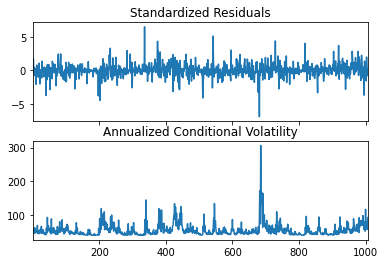

In [ ]:
fig = model_fit.plot(annualize="D")

In [ ]:
model_fit.conditional_volatility

1       3.325793
2       3.238583
3       3.506796
4       3.359295
5       2.914348
          ...   
1003    4.984424
1004    4.861931
1005    3.636274
1006    4.413304
1007    5.872751
Name: cond_vol, Length: 1007, dtype: float64

In [ ]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns_pct[:-(test_size-i)]
    model = arch_model(train, p=7, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns_pct.index[-365:])

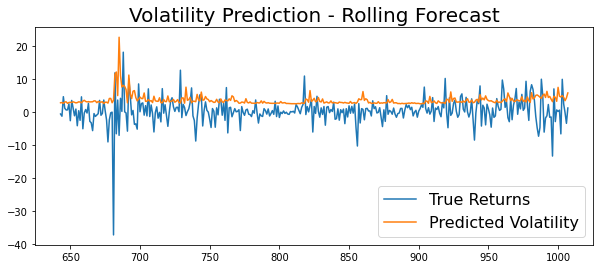

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns_pct[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

#Exploration2: log return regression

In [ ]:
df_price["log_returns"]=np.log(df_price.Close).pct_change().dropna()
df_price["log_returns_1"]=df_price["log_returns"].shift(1)
df_price["log_returns_2"]=df_price["log_returns"].shift(2)
df_price["log_returns_3"]=df_price["log_returns"].shift(3)
df_price["log_returns_4"]=df_price["log_returns"].shift(4)
df_price["log_returns_5"]=df_price["log_returns"].shift(5)
df_price["log_returns_6"]=df_price["log_returns"].shift(6)
df_price["log_returns_7"]=df_price["log_returns"].shift(7)
df=pd.concat([df_final,df_price["log_returns_1"]],axis=1) 
df=pd.concat([df,df_price["log_returns_2"]],axis=1) 
df=pd.concat([df,df_price["log_returns_3"]],axis=1) 
df=pd.concat([df,df_price["log_returns_4"]],axis=1) 
df=pd.concat([df,df_price["log_returns_5"]],axis=1) 
df=pd.concat([df,df_price["log_returns_6"]],axis=1)
df=pd.concat([df,df_price["log_returns_7"]],axis=1)  

In [ ]:
data = df.values[:, :df.shape[1]]
trans = StandardScaler()
data = trans.fit_transform(data)
df_final = pd.DataFrame(data)
df_final.columns=["return","twitter_vol",	"return_1",	"return_2",	"return_3","return_4",	"return_5",	"return_6",	"return_7",	"tweet_diff_1","positive","negative","log_return_1","log_return_2","log_return_3","log_return_4","log_return_5","log_return_6","log_return_7"]

In [ ]:
df_final

,return,twitter_vol,return_1,return_2,return_3,return_4,return_5,return_6,return_7,tweet_diff_1,positive,negative,log_return_1,log_return_2,log_return_3,log_return_4,log_return_5,log_return_6,log_return_7
0,-0.446010,1.154892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152808,-0.118678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.340399,1.057260,-0.445515,NaN,NaN,NaN,NaN,NaN,NaN,-0.173518,6.544164,-0.118678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.456632,1.220674,0.340537,-0.446476,NaN,NaN,NaN,NaN,NaN,0.279015,-0.152808,-0.118678,0.302017,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.039409,1.629595,1.456265,0.339559,-0.446331,NaN,NaN,NaN,NaN,0.704612,-0.152808,-0.118678,1.375189,0.301150,NaN,NaN,NaN,NaN,NaN
4,0.391053,1.200076,-0.039099,1.455261,0.339315,-0.446166,NaN,NaN,NaN,-0.748858,-0.152808,-0.118678,-0.149673,1.374150,0.300935,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2.664792,3.247777,-1.844087,0.123626,0.013282,0.136738,-0.815267,1.893768,-3.698320,2.501531,-0.152808,-0.118678,-1.603230,0.110466,0.020547,0.125425,-0.698387,1.557676,-3.305489
1004,-0.056074,10.144489,2.663878,-1.845017,0.123489,0.013219,0.139814,-0.818095,1.892962,11.951459,6.544164,-0.118678,2.178023,-1.603791,0.110345,0.021082,0.127835,-0.700538,1.557019
1005,-0.075326,3.762426,-0.055756,2.662848,-1.844181,0.123372,0.015919,0.138138,-0.817568,-11.067833,-0.152808,-0.118678,0.544987,2.176855,-1.603062,0.110848,0.023296,0.126333,-0.700081
1006,-0.977612,2.249436,-0.074999,-0.056726,2.661456,-1.843322,0.126408,0.014094,0.138195,-2.627099,-0.152808,-0.118678,-0.065135,0.544081,2.175710,-1.601958,0.113231,0.021712,0.126382


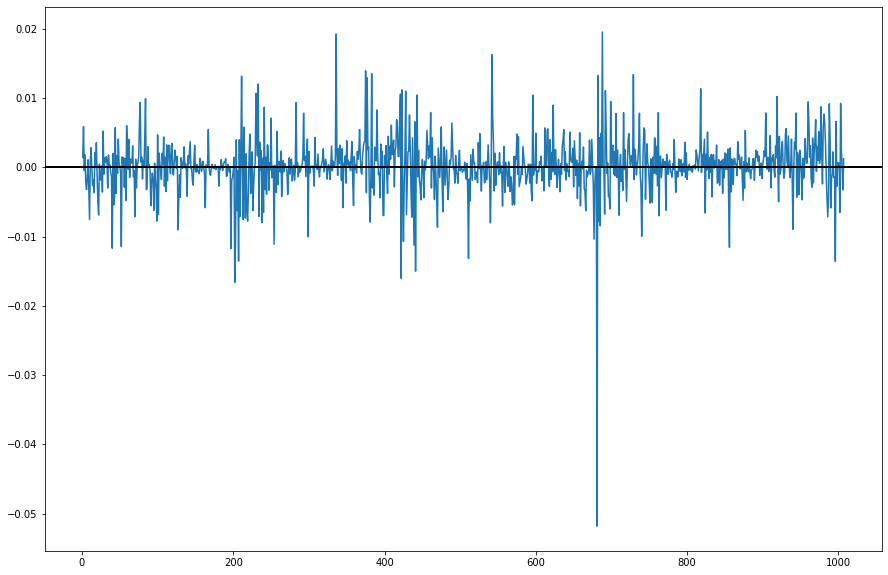

In [ ]:
df_price["log_returns"].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

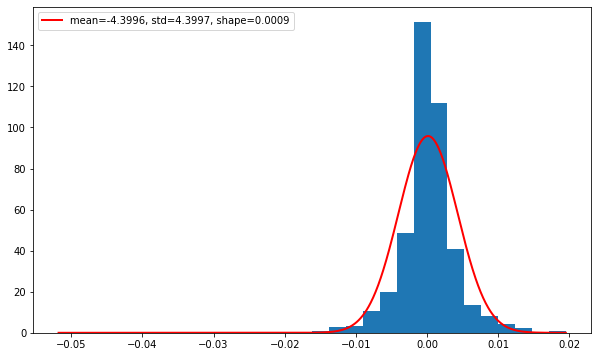

In [ ]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

values = df_price["log_returns"][1:len(df_price)] 

shape, loc, scale = stats.lognorm.fit(values)
x = np.linspace(values.min(), values.max(), len(values))
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

ax.hist(values, bins=30, density=True, stacked=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

In [ ]:
# MODEL 1
LR_result_1=[]
LR_result_1.append("model 1:")
df_model=df_final[2:len(df_final)]

X = df_model[['log_return_1',"tweet_diff_1"]] 
Y = df_model['return']

regr = linear_model.LinearRegression()
model=regr.fit(X, Y)
r_sq = model.score(X, Y)

LR_result_1.append('Intercept:'+str( regr.intercept_))
LR_result_1.append('Coefficients:'+str( regr.coef_))
LR_result_1.append("R_sq: " +str(r_sq))

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.45
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           3.24e-05
Time:                        15:40:41   Log-Likelihood:                -1417.9
No. Observations:                1006   AIC:                             2842.
Df Residuals:                    1003   BIC:                             2857.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8.315e-05      0.031      0.003   

In [ ]:
LR_result_2=[]
LR_result_2.append("model 2:")
df_model=df_final[2:len(df_final)]

X = df_model[['log_return_1','tweet_diff_1',"positive","negative"]] 
Y = df_model['return']


regr = linear_model.LinearRegression()
model=regr.fit(X, Y)
r_sq = model.score(X, Y)

LR_result_2.append('Intercept:'+str( regr.intercept_))
LR_result_2.append('Coefficients:'+str( regr.coef_))
LR_result_2.append("R_sq: " +str(r_sq))

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.429
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           0.000251
Time:                        15:41:29   Log-Likelihood:                -1417.5
No. Observations:                1006   AIC:                             2845.
Df Residuals:                    1001   BIC:                             2870.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.121e-05      0.031     -0.000   

In [ ]:

# MODEL 3
LR_result_3=[]
LR_result_3.append("model 1:")
df_model=df_final[8:len(df_final)]

X = df_model[['log_return_1','log_return_2','log_return_3','log_return_4','log_return_5','log_return_6','log_return_7','tweet_diff_1',"positive","negative"]] 
Y = df_model['return']


regr = linear_model.LinearRegression()
model=regr.fit(X, Y)
r_sq = model.score(X, Y)

LR_result_3.append('Intercept:'+str( regr.intercept_))
LR_result_3.append('Coefficients:'+str( regr.coef_))
LR_result_3.append("R_sq: " +str(r_sq))

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.410
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           0.000211
Time:                        15:43:03   Log-Likelihood:                -1404.1
No. Observations:                1000   AIC:                             2830.
Df Residuals:                     989   BIC:                             2884.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.031      0.011   